# EDA Project: Medical Insurance Charges

### **What is this  Dataset about?**

We aim to explore a medical insurance dataset to understand which factors influence insurance charges and how different variables interact with each other.

**Why EDA?**

- To understand the data structure

- To detect patterns and outliers

- To extract meaningful insights before modeling

| Column   | Meaning                    | Why is it important?                        |
| -------- | -------------------------- | ------------------------------------------- |
| age      | Age of the insured person  | Medical cost usually increases with age     |
| sex      | Gender (male / female)     | Used to check gender-based differences      |
| bmi      | Body Mass Index            | Indicator of body health (overweight/obese) |
| children | Number of children covered | Might affect insurance cost                 |
| smoker   | Smoking status             | One of the strongest health risk factors    |
| region   | Residential area           | May reflect healthcare cost differences     |
| charges  | Medical insurance cost     | **Target variable**                         |


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


In [3]:
df = pd.read_csv('D:\\Microsoft-Machine-Learning-Engineer-DEPI-Round4\\Data\\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

####  Key Observations:

- 1338 rows, 7 columns

- No missing values 

- Mix of numerical & categorical features

## Numerical Features

### **Age**

What does it represent?

- Age is one of the most important factors in healthcare costs. As people get older, the likelihood of chronic diseases increases, which leads to higher medical expenses and insurance charges.


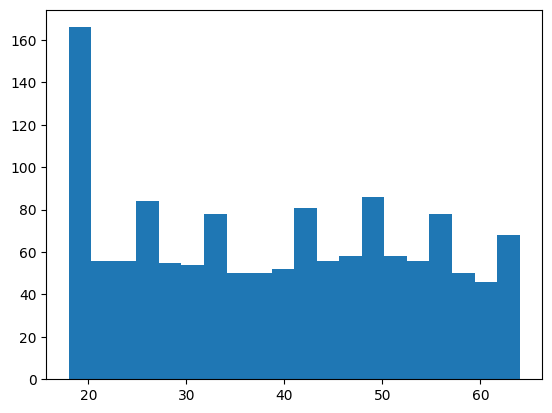

In [8]:
plt.hist(df['age'], bins=20)
plt.show()

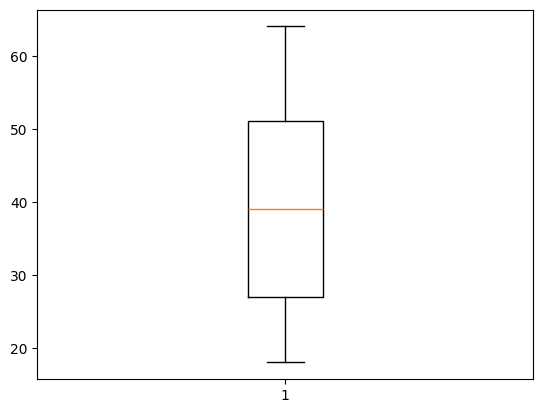

In [9]:
plt.boxplot(df['age'])
plt.show()

**Insights**

- Most ages are between 20 and 50

- Minimum age: 18, Maximum age: 64

- No extreme outliers detected

**Key Observations**

- The age distribution is relatively balanced.

- There are no extreme outliers.

- Insurance charges generally increase with age, especially after 40.

### **BMI**

BMI (Body Mass Index) is a numerical value that represents a person’s body weight relative to their height.
It is commonly used as a health indicator to classify individuals into weight categories.

In this dataset, BMI values are already calculated and provided for each individual.



BMI helps us understand whether a person’s weight might increase their health risk, which in turn can affect medical insurance charges.

**Higher BMI values are often associated with:**

- Increased risk of chronic diseases

- Higher medical expenses

- Higher insurance costs

**BMI Categories**

| BMI Range      | Category      |
| -------------- | ------------- |
| Less than 18.5 | Underweight   |
| 18.5 – 24.9    | Normal weight |
| 25 – 29.9      | Overweight    |
| 30 or more     | Obese         |


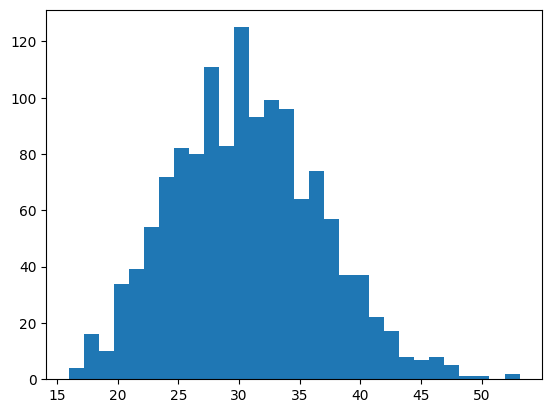

In [13]:
plt.hist(df['bmi'], bins=30)
plt.show()

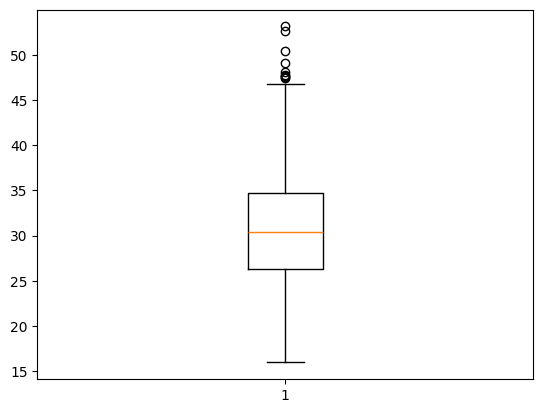

In [14]:

plt.boxplot(df['bmi'])
plt.show()

**Insights**

- Average BMI ≈ 30 → Overweight

- Most individuals are overweight or obese

- Clear outliers above BMI = 50

**Key Observations from BMI Analysis**

- Most BMI values are concentrated between 25 and 35, indicating that the majority of individuals fall into the overweight or obese categories.

- The BMI distribution shows clear outliers above 50, which represent individuals with extremely high BMI values.

- These outliers are rare but can significantly affect the average BMI and overall analysis.

**BMI and Insurance Charges**

> BMI alone does not strongly increase insurance charges for all individuals.

> However, when high BMI is combined with smoking, insurance charges increase dramatically.

> This indicates an interaction effect where BMI becomes much more influential when paired with other health risk factors.

### **Charges (Target Variable)**

What does this feature represent?
  - Charges represent the medical insurance cost billed to the individual.

Why is this feature important?
   - This is the target variable that the analysis aims to understand and explain.

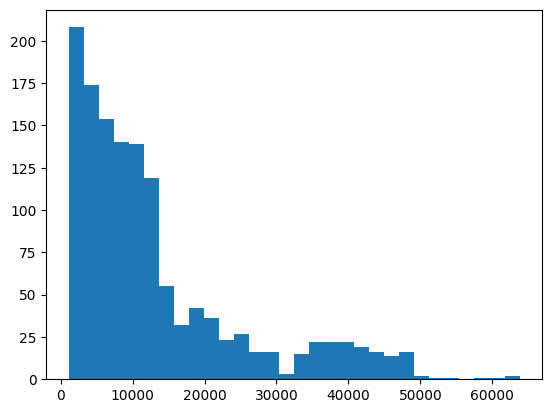

In [15]:
plt.hist(df['charges'], bins=30)
plt.show()

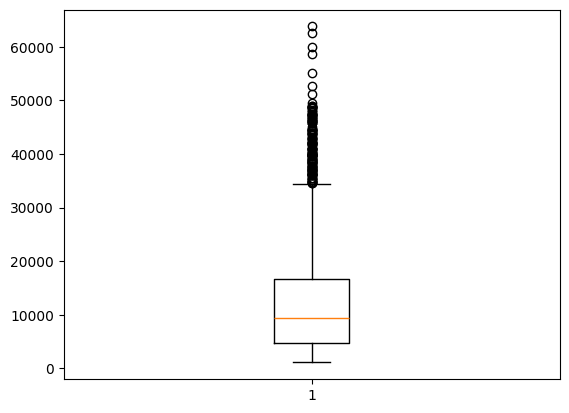

In [16]:

plt.boxplot(df['charges'])
plt.show()

**Insights**

- Highly right-skewed distribution

- Presence of extreme outliers

- High charges likely related to smoking

**Key Observations**

- Most individuals have relatively low to moderate charges.

- Very high charges are mainly associated with smokers and older individuals.

## Categorical Features

### **Sex**

What does this feature represent?

- Sex indicates the gender of the insured individual (male or female).

Why is sex important?

- This feature is used to explore whether there are gender-based differences in medical insurance charges.

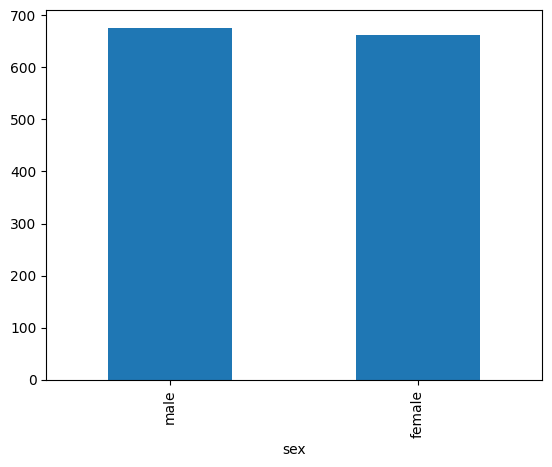

In [10]:
df['sex'].value_counts().plot(kind='bar')
plt.show()


**Distribution Insights**

- The dataset contains nearly equal numbers of males and females.

**Key Observations**

- No strong imbalance between genders.

- Gender alone does not significantly impact insurance charges.

### **Smoker**

What does this feature represent?

- Smoker indicates whether the individual is a smoker (yes or no).

Why is smoking important?

- Smoking is a major health risk factor and strongly influences medical expenses.

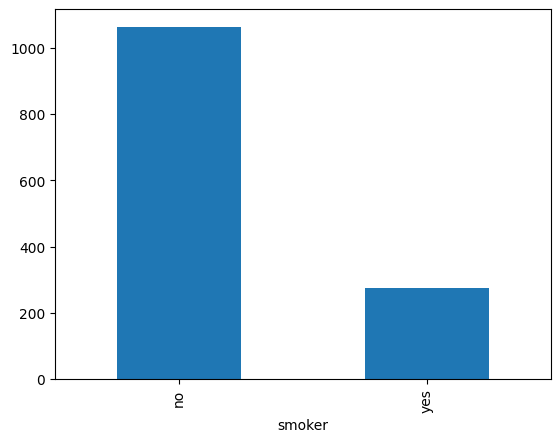

In [15]:
df['smoker'].value_counts().plot(kind='bar')
plt.show()


**Insights**

- Smokers are a minority

- But they incur much higher charges

**Key Observations**

- Smokers have dramatically higher insurance charges.

- Smoking shows the strongest relationship with charges among all features.

### **Region**

What does this feature represent?

- Region indicates the geographical area where the insured individual lives.

Why is region important?

- It helps analyze whether medical costs differ by location.

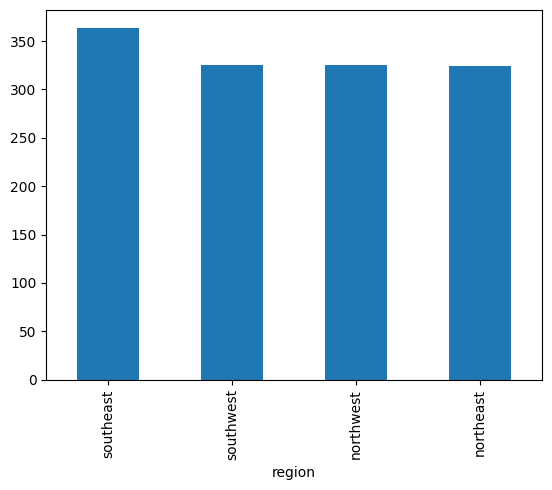

In [11]:
df['region'].value_counts().plot(kind='bar')
plt.show()


**Insights**

- Regions are fairly balanced

- No dominant region

## Relationships Between Variables (Bivariate Analysis)
Goal:
Understand how different features affect insurance charges and interact with each other.

### Charges vs Smoker


#### Do smokers pay higher insurance charges than non-smokers?

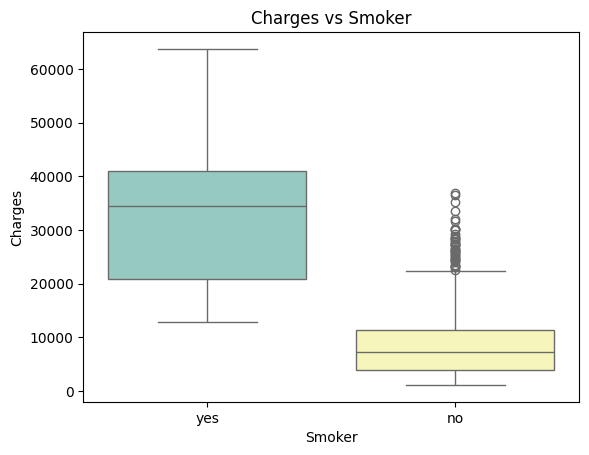

In [12]:
sns.boxplot(x='smoker', y='charges', data=df, hue = 'smoker', palette='Set3')
plt.title('Charges vs Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()




- Each box represents the distribution of charges.

- The median line shows the typical charge value.

- Outliers represent extremely high charges.

**Insight**

- Smokers have dramatically higher insurance charges compared to non-smokers.


- Notice how almost all extreme outliers belong to smokers

- Even the minimum charges for smokers are higher than many non-smokers


### Charges vs Age


#### How does age affect insurance charges?

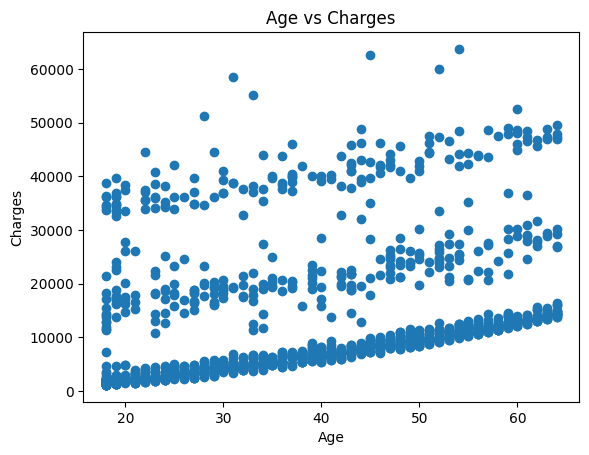

In [13]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()



- Each point represents one person.

- We observe how charges change as age increases.

**Insight**

- Insurance charges increase with age, especially after 40.

- Younger individuals have lower and more clustered charges.

- Older individuals show higher variability and higher maximum charges.



### Charges vs BMI (Hue = Smoker)


#### Does BMI alone increase insurance charges, or does smoking play a role?

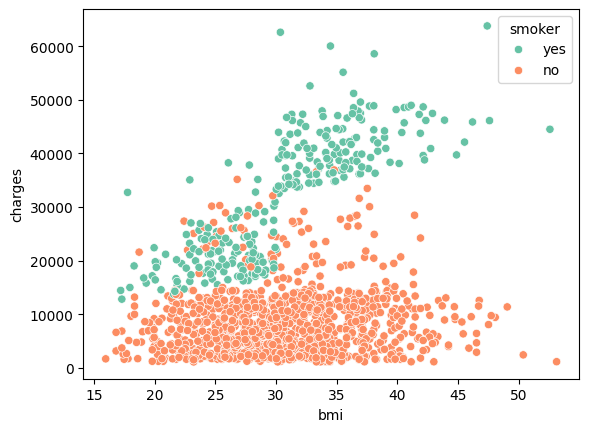

In [14]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df , palette='Set2')
plt.show()


- X-axis: BMI

- Y-axis: Charges

- Color indicates smoking status

**Insight**

- High BMI alone does not strongly increase charges unless combined with smoking.

- Non-smokers with high BMI mostly have moderate charges.

- Smokers with high BMI have extremely high charges.

- This is an interaction effect, not a single-variable effect.


## Charges vs Children


### Does having more children significantly increase insurance charges?

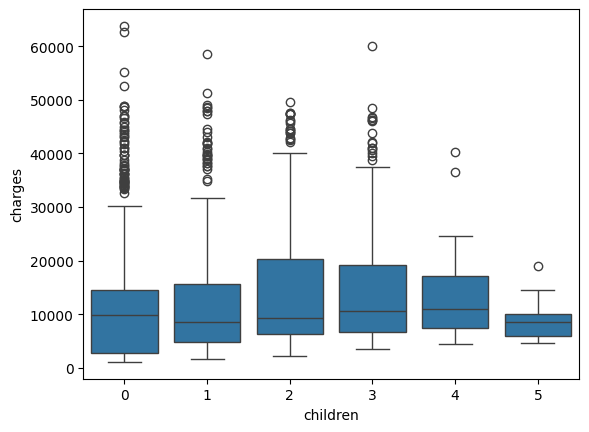

In [15]:
sns.boxplot(x='children', y='charges', data=df)
plt.show()


*Compare median charges across different numbers of children.*

**Insight**

- The number of children has a relatively small impact on insurance charges.

- Median charges are similar across groups.

- No strong upward trend as children increase.



## Charges vs Region


### Does geographical region significantly affect insurance charges?

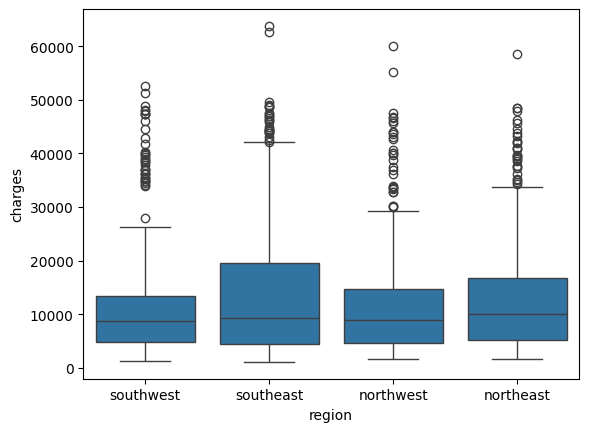

In [16]:
sns.boxplot(x='region', y='charges', data=df)
plt.show()


*Compare distributions across regions.*

**Insight**

- Only slight variations exist across regions, with no strong regional effect.

- Regions have overlapping distributions.

- No region consistently shows higher or lower charges.



## Multivariate Analysis

### Correlation Matrix

#### Which numerical variables are most correlated with insurance charges?

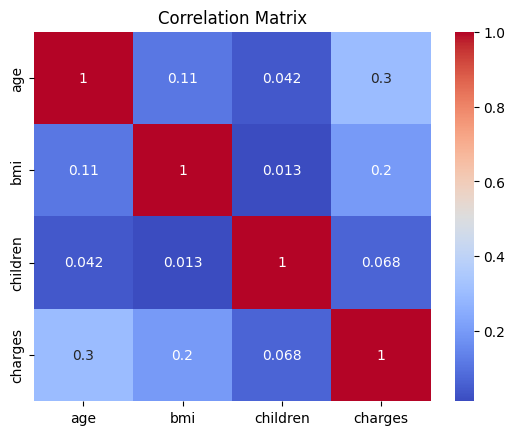

In [17]:
corr = df[['age','bmi','children','charges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()


In [18]:
corr = df[['age','bmi','children','charges']].corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Matrix'
)

fig.show()


**How to read the heatmap?**

- Values close to 1 → strong positive correlation

- Values close to 0 → weak or no correlation

**Insights**

- Age & charges → strong positive correlation

- BMI & charges → moderate correlation

- Children & charges → weak correlation

- Correlation does not mean causation

- Smoking is missing here because it is categorical



### Charges vs Age & Smoker


#### How does smoking change the relationship between age and charges?

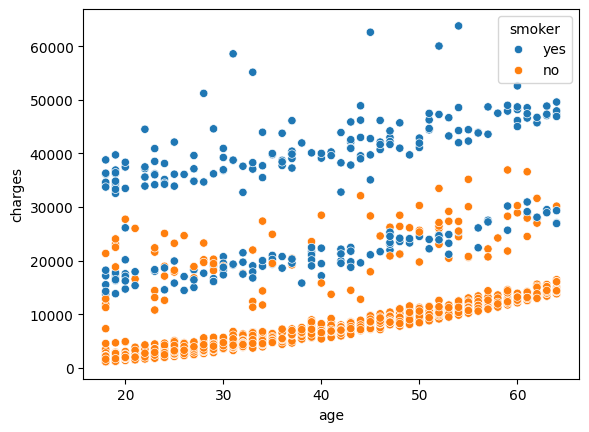

In [19]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.show()


In [20]:
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    title='Age vs Charges (Smoker vs Non-Smoker)',
    opacity=0.7
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Charges'
)

fig.show()


**Insight**

- Smoking amplifies the effect of age on medical charges.

- Older smokers have the highest charges.

- Age effect is much stronger among smokers.



### Feature Engineering: BMI Category 


#### Is it easier to analyze BMI using categories instead of raw values?

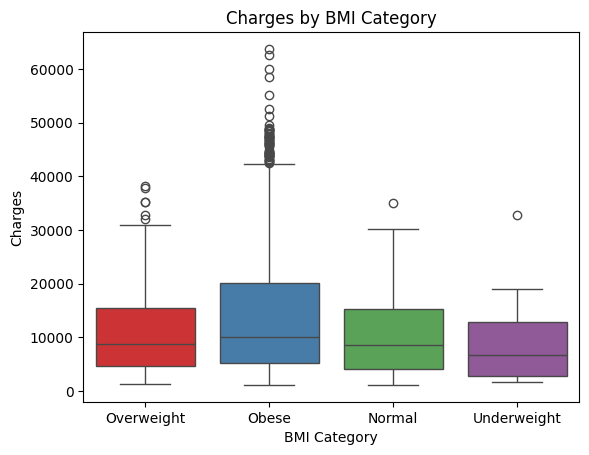

In [21]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)
sns.boxplot(x='bmi_category', y='charges', data=df,hue='bmi_category', palette='Set1')
plt.title('Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.show()


In [22]:
fig = px.box(
    df,
    x='bmi_category',
    y='charges',
    color='bmi_category',
    title='Charges by BMI Category'
)

fig.update_layout(
    xaxis_title='BMI Category',
    yaxis_title='Charges'
)

fig.show()


**Insight**

- Obese individuals—especially smokers—have the highest medical charges.


- Categorization improves interpretability.

- Helps explain results to non-technical audiences.



## Key Findings (Final Summary)

- Smoking is the strongest factor affecting insurance charges.

- Age has a clear positive relationship with charges.

- BMI alone is not a strong predictor unless combined with smoking.

- Region and number of children have minimal impact.